## Exercise 1

Read the edgelist and the nodelist of the dummy multilayer network, and create the following adjacency matrices:
* parent-child
* family
* household
* neighbor
* school
* work

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [2]:
nodes = pd.read_csv('nodelist.csv',index_col=None,header=0)
edges = pd.read_csv('edgelist.csv',index_col=None,header=0)

In [3]:
adj_dict = {}
for selected in edges["edgetype"].unique():
    G = nx.from_edgelist(np.array(edges[edges["edgetype"]==selected][["source","target"]]))
    for n in nodes["node_id"]:
        if n not in G.nodes():
            G.add_node(n)
    adj_dict[selected] = nx.adjacency_matrix(G)

In [4]:
family = [
 'child',
 'cousin',
 'grandchild',
 'niece / nephew',
 'grandparent',
 'sibling',
 'parent',
 'aunt / uncle',
 'partner',
 'mother / father-in-law',
 'sister / brother-in-law',
 'daughter / son-in-law']

In [55]:
N = adj_dict['parent'].shape[0]

adj_dict["family"] = csr_matrix((N,N))

for selected in family:
    adj_dict["family"] = adj_dict["family"] + adj_dict[selected]
    adj_dict["family"] = csr_matrix(adj_dict["family"] > 0,dtype='int')

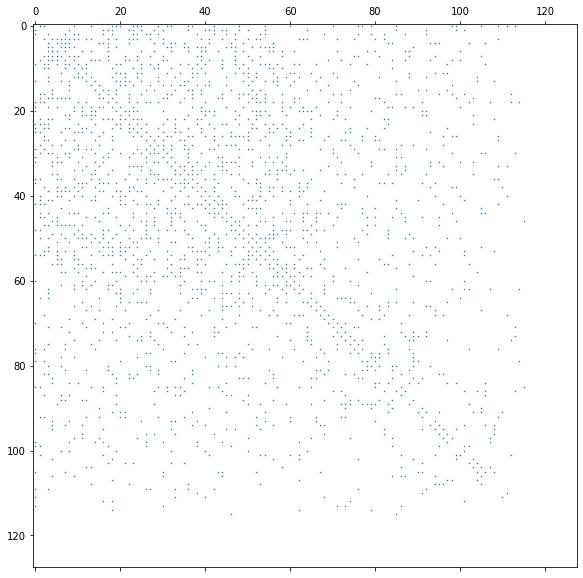

In [56]:
plt.subplots(1,1,figsize=(10,10))
plt.spy(adj_dict["family"],alpha=1,markersize=0.5)

## Exercise 2

Using the five main layers (leaving out the parent-child), calculate and visualize the distribution of the degree, and the number of layers a node participates in!

In [43]:
degree = {}
for layer in ['family','household','work','school','neighbor']:
    degree[layer] = np.array(adj_dict[layer].sum(axis=0))[0]

In [44]:
num_layers = np.zeros(N)
for layer in degree:
    num_layers += (degree[layer]>0)


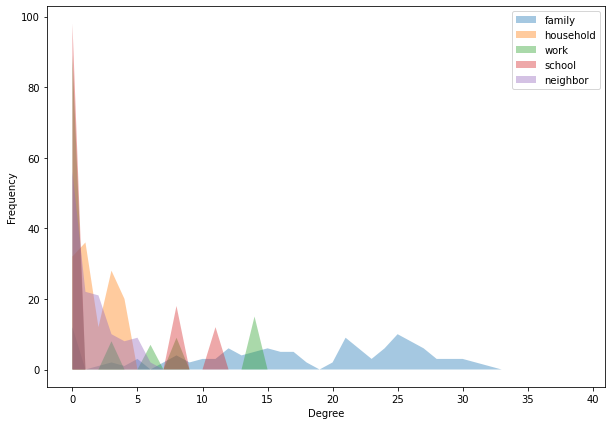

In [46]:
plt.figure(figsize=(10,7))
for layer in degree:
    y,x = np.histogram(degree[layer],range=(0,40),bins=40)
    plt.fill_between(x[:-1],y,alpha=0.4,label=layer)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()

## Exercise 3

List the parents of the classmates of all the nodes that are currently attending school! Solve the exercise with matrix multiplication! Explain why you might have gotten elements larger than 1 in the multiplication result!

In [47]:
pd.DataFrame((adj_dict["school"] @ adj_dict["child"]).nonzero()).T.groupby(0).agg(lambda x: list(x))

,1
0,
0,"[19, 80, 43, 16, 50, 13, 55, 11, 66, 25, 8, 49..."
1,"[19, 80, 43, 16, 50, 13, 55, 11, 66, 25, 8, 49..."
2,"[3, 18, 19, 80, 43, 16, 50, 13, 55, 11, 66, 25..."
3,"[53, 24, 19, 2, 80, 43, 16, 50, 13, 55, 11, 66..."
4,"[25, 55, 11, 41, 23, 0, 97, 90, 74, 67, 14, 50..."
5,"[25, 55, 11, 41, 23, 0, 97, 90, 74, 67, 14, 50..."
6,"[19, 80, 43, 16, 50, 13, 55, 11, 66, 25, 8, 62..."
7,"[25, 55, 11, 41, 23, 0, 97, 90, 74, 67, 14, 50..."
8,"[25, 55, 11, 41, 23, 0, 97, 90, 74, 67, 14, 50..."


## Exercise 4

How could you detect parallel edges, e.g. edges that exist in multiple different layers between two nodes? List all such edges with the corresponding layers!

In [64]:
A = csr_matrix((N,N))

for layer in ['family','household','work','school','neighbor']:
    A += adj_dict[layer]
    
multiedges = pd.DataFrame((A>1).nonzero()).T

def isin_layer(*edge):
    res = []
    for layer in ['family','household','work','school','neighbor']:
        if adj_dict[layer][edge]:
            res.append(layer)
    return res

In [68]:
multiedges.columns = ["source","target"]
multiedges["layers"] = multiedges.apply(lambda r: isin_layer(*r),axis=1)

In [69]:
multiedges

,source,target,layers
0,0,1,"[family, household, work, school, neighbor]"
1,0,2,"[family, school]"
2,0,9,"[family, school, neighbor]"
3,0,12,"[work, school]"
4,0,13,"[family, work]"
...,...,...,...
367,89,88,"[family, household]"
368,90,91,"[family, household]"
369,91,90,"[family, household]"
370,94,95,"[family, household]"


## Exercise 5

Try to load the network into `pymnet`, and experiment with the visualization. Try to solve the previous exercises using `pymnet`. Attention, this approach won't work for larger networks!

## Exercise 6

Enumerate the connected components of each layer, calculate their sizes, list them! What do they correspond to?

In [72]:
for layer in ['family','household','work','school','neighbor']:
    print(sorted([len(c) for c in nx.connected_components(nx.from_scipy_sparse_matrix(adj_dict[layer]))],key=lambda x: -x))

[116, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[15, 9, 7, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[12, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[25, 14, 6, 4, 4, 4, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Exercise 7

Let's suppose that all of these people suddenly meet at a festival where they compete in groups with each other. The group assignment is random, there are 5 different groups, and everyone is part of exactly one group.

Create such a random assignment! Create the corresponding "affiliation matrix"!

Create the adjacency matrix of people based on group co-affiliation!

In [84]:
groups = np.random.randint(low=0,high=5,size=(N,))
aff = csr_matrix((np.ones(N),(range(N),groups)),shape=(N,5)).todense()

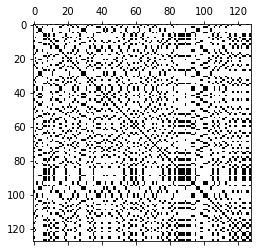

In [85]:
plt.spy(aff @ aff.T)

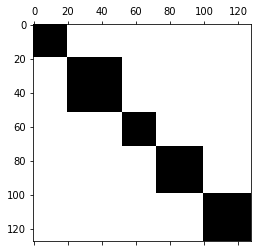

In [86]:
plt.spy(aff[np.argsort(groups),:] @ aff.T[:,np.argsort(groups)])